![](fig/univ.png)


# AI-1: ML/AI Basics
## Final Project: Can Humans Fake Randomness?

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />

### <font color='royalblue'>[Presentation video](https://drive.google.com/file/d/1JYfurAj7mo0bT02lSsGMB33r8P44bXXQ/view)</font>

![](fig/coin2.jpg)


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from scipy.stats import ttest_ind
from scipy.special import expit

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

from randomness_test import frequency_test
from randomness_test import frequency_std_test
from randomness_test import running_frequency_std_test
from randomness_test import run_test
from randomness_test import block_test
from randomness_test import alternation_test
from randomness_test import monotonicity_test

from prettytable import PrettyTable

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
tf.keras.backend.clear_session()

## 1. Introduction

The concept of randomness emerges often in our daily lives as well as in many professional fields including ML and AI. Yet humans are known to be struggling with the deep understanding of randomness. This manifests itself in the form of well-known cognitive biases, such as gambler's fallacy and many others. 
E.g., in response to complaints from customers, iTunes' shuffle feature was made less random in order to make it *feel* more random.<br/>
Our inability to critically assess randomness has gained attention of many researchers and provoked numerous studies including those by the Nobel Prize-winning economist Daniel Kahneman [1]. 

In our small project, we'd like to approach this vast and interesting topic in two ways:

- **Take a sneak peak at our brain and explore our perception of randomness.**<br/>
   For this purpose, we'll conduct a simple coin toss experiment — as a computer simulation and as a human thought experiment.
<br/>
   
- **Utilize ML methods to predict whether a random binary sequence was generated by human or not.**<br/>
    First, we'll build a classifier using simple logistic regression, and then move on towards neural networks.

## 2. Collecting data

For our analysis and model building, we will use the following data:

- **Dataset of ca 130 binary sequencies** `machine_data.csv` **of length 200 generated by Python's random number generator.**<br/>
Although computers are only able to generate pseudo-random numbers, they are designed to pass various randomness tests. For the purpose of the current project, pseudo-random numbers can be considered as a valid approximation to the true random numbers.


- **Dataset of ca 130 binary sequencies** `human_data.csv` **of length 200 generated by humans.**<br/> Sequences were partly generated by the project authors and partly taken from [2]. In both cases, humans tried to mimic randomness to the best of their ability. <br/>


- **Dataset of 20 binary sequencies** `olga_data.csv` **of length 200 generated by the project author Olga.**<br/> First ten sequences were generated in the beginning of the project and another ten were generated in the end of the project, after analyzing the differences and making conclusions. <br/>


- **Dataset of 18 binary sequences** `univ_data.csv` **of length ca 200 generated on EdStem forum by the students of Univ.AI.**<br/> This dataset will be used for the final model testing.

In [2]:
# Data from humans
df_human = pd.read_csv('human_data.csv')

# Data from machine
df_machine = pd.read_csv('machine_data.csv')

# Data from Olga
df_olga = pd.read_csv('olga_data.csv')

# Data from Univ.AI students
df_univ = pd.read_csv('univ_data.csv')

## 3. Methodology: How to assess the differences?

![](fig/dilbert.jpg)

We know that every possible random sequence is equally likely to happen. We also know that it's not possible to prove mathematically if a sequence was randomly generated or not.<br/>
Of course, we can say that among length-200 binary random sequences, the sequences with the equal number of 1-s and 0-s will come up most often. However, humans seem to be good at keeping track of this 50/50 proportion and reproduce it most often too. 

Therefore, we resort to the so called **randomness tests** which have been developed to measure the quality of a random number generator [3,4]. These tests aim to find patterns in data and output the p-value which tells how likely these patterns are to occur in a random sequence.

We take some inspiration from these tests (e.g., what are the patterns to look for?), but utilize a different approach without hypothesis testing. The underlying idea is: *with ML methods, we don't necessarily need to care about the expected distribution.* All we need is to have enough pattern characterics for both human and computer data.

For the purpose of this project, we've created the following custom set of randomness tests:

- `frequency_test`: Finds relative frequency of 1-s.
- `frequency_std_test`: Splits the string into non-overlapping blocks of size $m$. Finds standard deviation of relative frequencies of 1-s within blocks.
- `running_frequency_std_test`: Finds standard deviation of running relative frequencies of 1-s.
- `run_test`: Finds total number of runs (run is an uninterrupted sequence of identical bits).
- `block_test`: Splits the string into non-overlapping blocks of size $m=3$ or $m=4$.
    Finds frequencies of all $2^m$ unique patterns and their standard deviation.
- `alternation_test`: Finds total number of non-overlapping blocks "101010..." and "010101..." of length $m$.
- `monotonicity_test`: Finds total number of non-overlapping blocks "111111..." and "000000..." of length $m$. 

## 4. Evaluating randomness

In [3]:
# Merging human and machine data into one dataframe

df = pd.concat([df_human, df_machine], ignore_index = True)

In [4]:
# Implementing randomness tests

# For merged human and machine data
df = frequency_test(df)
df = running_frequency_std_test(df)
df = run_test(df)
df = frequency_std_test(df, 6)
for m in [3,4]:
    df = block_test(df, m)
for m in [4,6]:
    df = alternation_test(df, m)
    df = monotonicity_test(df, m)

# For Univ.AI student data
df_univ = frequency_test(df_univ)
df_univ = running_frequency_std_test(df_univ)
df_univ = run_test(df_univ)
df_univ = frequency_std_test(df_univ, 6)
for m in [3,4]:
    df_univ = block_test(df_univ, m)
for m in [4,6]:
    df_univ = alternation_test(df_univ, m)
    df_univ = monotonicity_test(df_univ, m)

# For Olga data
df_olga = frequency_test(df_olga)
df_olga = running_frequency_std_test(df_olga)
df_olga = run_test(df_olga)
df_olga = frequency_std_test(df_olga, 6)
for m in [3,4]:
    df_olga = block_test(df_olga, m)
for m in [4,6]:
    df_olga = alternation_test(df_olga, m)
    df_olga = monotonicity_test(df_olga, m)

In [5]:
# Labeling human and machine data

# 0 is for Human
label_human = np.zeros(len(df_human))
# 1 is for Machine
label_machine = np.ones(len(df_machine))

labels = np.concatenate((label_human, label_machine))
df['Label'] = list(labels.astype('int'))
df.head()

,String,freq_test,rfreq_std_test,run_test,freq_std_test,block_3_test,block_4_test,alter_4_test,mono_4_test,alter_6_test,mono_6_test,Label
0,1110010010101010001001001001000100001011111011...,0.495,0.143645,136,0.166590,5.117372,2.619041,18,3,6,0,0
1,1110001010010010100000101001011101010101010010...,0.540,0.154085,134,0.204155,6.036348,2.394656,14,6,8,2,0
2,1111111000101010100000001010001010101010101010...,0.480,0.135746,145,0.172901,8.699856,4.371427,25,2,11,2,0
3,1110100100000000010010101000101000101001010101...,0.450,0.133451,141,0.176407,6.740734,3.461846,21,4,7,0,0
4,0010111101001010101111111100101000010010100110...,0.495,0.136970,129,0.216878,5.952940,2.394656,17,6,7,2,0


### 4.1. What's wrong with our brain?

After performing the tests, let us explore the differences between human and machine generated sequences.

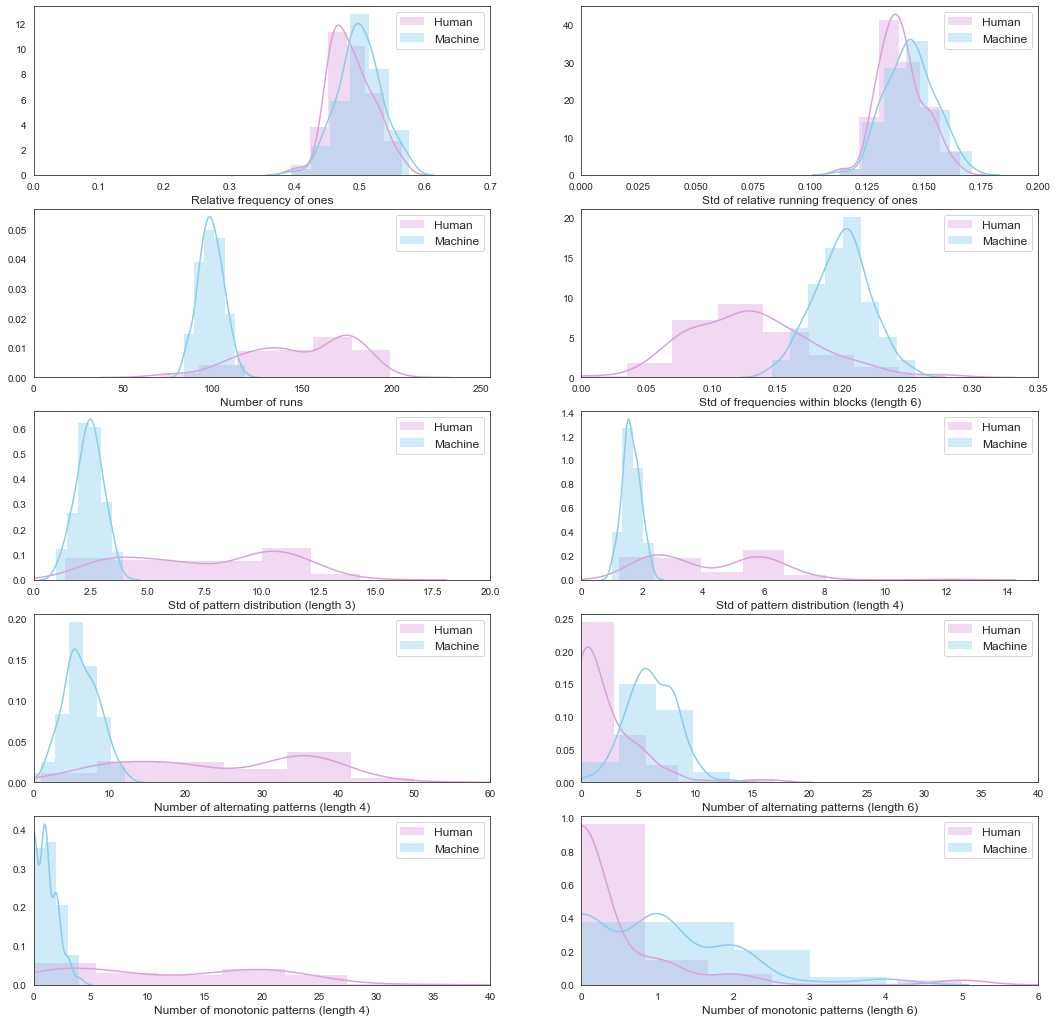

In [8]:
# Plotting histograms

# Dataframe with test results only
features = df.drop("String", axis = 1).drop("Label", axis = 1)

test_list = list(features.columns)
bin_list = [[6,6],[6,6],[6,6],[8,8],[6,6],[8,4],[6,6],[6,4],[6,4],[6,4]]
xlim_list = [0.7, 0.2, 255, 0.35, 20, 15, 60, 40, 40, 6]
label_list = ['Relative frequency of ones',
 'Std of relative running frequency of ones',
 'Number of runs',
 'Std of frequencies within blocks (length 6)',
 'Std of pattern distribution (length 3)',
 'Std of pattern distribution (length 4)',
 'Number of alternating patterns (length 4)',
 'Number of alternating patterns (length 6)',
 'Number of monotonic patterns (length 4)',
 'Number of monotonic patterns (length 6)']

plt.figure(figsize=(18,18)), sns.set_style("white")
for i in range(0,10):
    plt.subplot(5,2,i+1)
    d = sns.distplot(features.loc[df['Label'] == 0, [test_list[i]]], label = "Human", bins = bin_list[i][0], hist_kws = dict(edgecolor = "none"), color = 'plum')
    d = sns.distplot(features.loc[df['Label'] == 1, [test_list[i]]], label = "Machine", bins = bin_list[i][1], hist_kws = dict(edgecolor = "none"), color = 'skyblue')
    d.set_xlabel(label_list[i], fontsize = 12), d.set_ylabel("", fontsize = 12), plt.legend(fontsize = 12), plt.xlim(0,xlim_list[i])
#warnings.filterwarnings('ignore')

We can see the dramatic differences in all the test distributions except from the most basic frequency tests. 

We interpret the results as follows:

- Human sequences are highly alternating. They have higher number of runs and higher number of patterns like "010101".
- On the contrary, machines generate longer monotonous blocks, which are obviously perceived by humans as "not random enough".
- In machine sequences, all unique block patterns are appearing more or less equally frequently. 
- Humans may favor some patterns and disregard the others.
- Machine results are more uniform, while human performance can vary from very poor to quite good.

### 4.2. Feature selection

Now we run the **Welch's t-test** in order to quantify how well our randomness tests discriminate between human/machine.

In [9]:
# Calculate Welch's t-test

selection = {}
for i in features.columns:
    selection[i] = (ttest_ind(features.loc[df['Label'] == 0, [i]], features.loc[df['Label'] == 1, [i]], equal_var = False)[0])    

# Sort the dictionary as per t-test score
sorted_selection = {k: v for k, v in sorted(selection.items(), key = lambda item: np.abs(item[1]), reverse = True)}

The randomness tests are ranked as follows:

In [10]:
for i in range(len(sorted_selection)):
    print('{}:'.format([key for key in sorted_selection.keys()][i]),[value for value in sorted_selection.values()][i])

run_test: [19.21999855]
block_3_test: [17.21358687]
alter_4_test: [16.93834975]
block_4_test: [15.42683161]
freq_std_test: [-15.28146754]
alter_6_test: [14.57321697]
mono_4_test: [-12.79055962]
mono_6_test: [-5.33351568]
rfreq_std_test: [-3.46329074]
freq_test: [-3.23786571]


In principle, we can use `run_test` as a single predictor for our classifier, because the differences in distributions are very large and therefore we can expect good performance even with a single predictor. We will try that first. However, since our task at hand is not computationally expensive, we can use all the meaningful predictors (i.e., except `freq_test` and `rfreq_std_test`).

In [11]:
# Drop insignificant predictors

features_final = features.drop("freq_test", axis = 1).drop("rfreq_std_test", axis = 1) 

## 5. Building a classifier

In [12]:
# Split the data into train-test set

X = df[list(features_final.columns)]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

### 5.1. Simple logistic regression

#### 5.1.1. Single predictor

Now we build a simple logistic regression model with `run_test` as predictor.

In [13]:
# Logistic regression with a single predictor

X_train_run = X_train[['run_test']]
X_test_run = X_test[['run_test']]

lreg_run = LogisticRegression(random_state = 5, max_iter = 20000, C = 100000)
lreg_run.fit(X_train_run, y_train);

y_test_run_pred = lreg_run.predict(X_test_run)

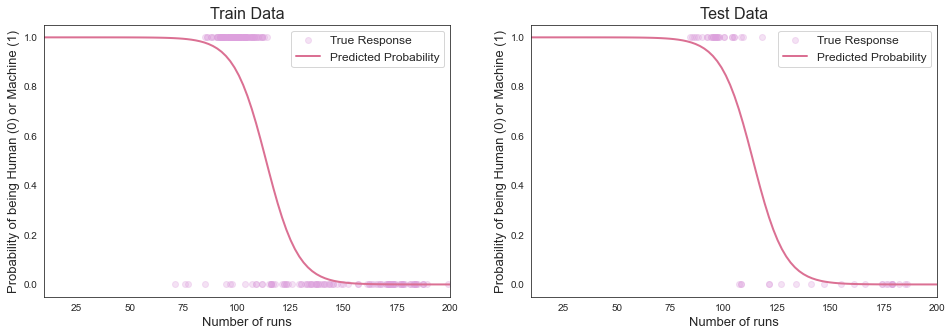

In [14]:
# Plotting logistic regression

# Logistic curve
x = np.linspace(0, 200, 100)
loss = expit(x*lreg_run.coef_ + lreg_run.intercept_).T

plt.figure(figsize = (16,5))

plt.subplot(121)
plt.plot(X_train_run[["run_test"]], y_train, 'o', color = 'plum', label = "True Response", alpha = 0.3)
plt.plot(x, loss, color = 'palevioletred', linewidth = 2, label = "Predicted Probability")
plt.xlabel("Number of runs", fontsize = 13), plt.ylabel("Probability of being Human (0) or Machine (1)", fontsize = 13)
plt.legend(loc = 'upper right', fontsize = 12), plt.title("Train Data", fontsize = 16), plt.xlim(10,200)

plt.subplot(122)
plt.plot(X_test_run[["run_test"]], y_test, 'o', color = 'plum', label = "True Response", alpha = 0.3)
plt.plot(x, loss, color = 'palevioletred', linewidth = 2, label = "Predicted Probability")
plt.xlabel("Number of runs", fontsize = 13), plt.ylabel("Probability of being Human (0) or Machine (1)", fontsize = 13)
plt.legend(loc = 'upper right', fontsize = 12), plt.title("Test Data", fontsize = 16), plt.xlim(10,200)

plt.show()

In [15]:
# Accuracy

accuracy_run = round(accuracy_score(y_test, y_test_run_pred)*100,2)
print(f'The model accuracy is {accuracy_run}%')

The model accuracy is 92.45%


#### 5.1.2. Multiple predictors

We will now proceed with adding more predictors: `run_test`, `freq_std_test`, `block_3_test`, `block_4_test`, `alter_4_test`, `alter_6_test`, `mono_4_test`, `mono_6_test`.

In order to be sure about model accuracy, we calculate **cross-validation accuracy across different bootstraps**.

In [252]:
# Logistic regression with multiple predictors, verified by bootstrap and cross-val

# List of accuracies across bootstraps
accuracy_list = []

# Do bootstrap
for b in range(100):
    df_boot = df.sample(frac = 1, replace = True)
    X_boot = df_boot[list(features_final.columns)]
    y_boot = df_boot['Label']
    
    # Logistic regression
    lreg_boot = LogisticRegression(random_state = 5, max_iter = 20000, C = 100000)
    
    # Cross-validation accuracy for this bootstrap iteration
    cv_accuracy = cross_validate(lreg_boot, X_boot, y_boot, scoring = "accuracy", cv = 10)
    cv_accuracy_mean = np.mean(cv_accuracy['test_score'])*100
    accuracy_list.append(cv_accuracy_mean)

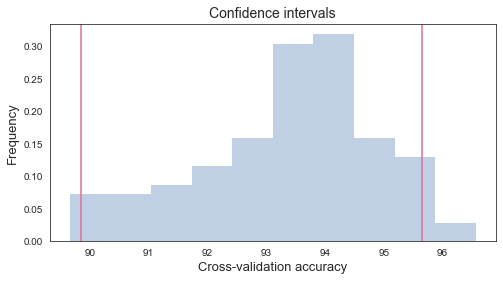

Confidence intervals for accuracy are: [89.8, 95.7]


In [253]:
# Confidence intervals for accuracy
accuracy_CI = (np.percentile(accuracy_list, 2.5), np.percentile(accuracy_list, 97.5))

plt.figure(figsize = (8,4)), plt.title("Confidence intervals", fontsize = 14)
plt.hist(accuracy_list, color = 'lightsteelblue', density = True, bins = 10, edgecolor = "none", alpha = 0.8, label = "Probability density for height")
plt.axvline(accuracy_CI[1], 0, 1, color = 'palevioletred', label = 'Right Interval')
plt.axvline(accuracy_CI[0], 0, 1, color = 'palevioletred', label = 'Left Interval')
plt.xlabel('Cross-validation accuracy', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.show()

print('Confidence intervals for accuracy are: [{}, {}]'.format(round(accuracy_CI[0],1), round(accuracy_CI[1],1)))

#### 5.1.3. More on classification metrics

For more inference, we compute **False Positive Rate**, **False Negative Rate** and plot the **ROC Curve**.

Due to time limitations, we do it without bootstrap and cross-validation.

In [16]:
# Logistic regression with multiple predictors

lreg = LogisticRegression(random_state = 5, max_iter = 20000, C = 100000)
lreg.fit(X_train, y_train);
y_test_pred = lreg.predict(X_test)

# Confusion Matrices
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_pred).ravel()
# False Positive Rate
fpr = round(100*(fp/(fp + tn)), 1)
# False Negative Rate
fnr = round(100*(fn/(tp + fn)), 1)

t = PrettyTable()
t.field_names = ["False Positive Rate", "False Negative Rate"]
t.add_row([fpr, fnr])
print(t)

+---------------------+---------------------+
| False Positive Rate | False Negative Rate |
+---------------------+---------------------+
|         13.0        |         0.0         |
+---------------------+---------------------+


We see that our model did not misclassify any machine sequences, but classified several human sequencies as machine sequencies. This is an expected outcome: machines cannot be less random than they are programmed to be. On the other hand, humans can be flexible in their performance.

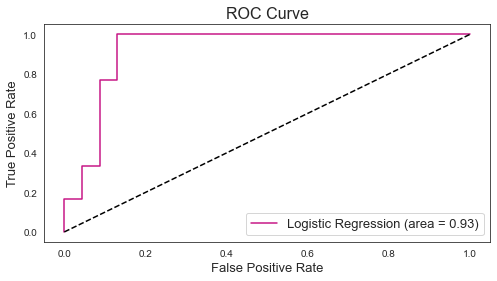

In [17]:
# Compute probability estimates
y_probs = lreg.predict_proba(X_test)[:,1]

# Compute ROC curves
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Compute AUC scores
auc = roc_auc_score(y_test, y_test_pred)

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(fpr, tpr, label = f'Logistic Regression (area = {auc:.2f})', color = 'mediumvioletred')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False Positive Rate', fontsize = 13), ax.set_ylabel('True Positive Rate', fontsize = 13)
ax.set_title('ROC Curve', fontsize = 16), ax.legend(loc = "best", fontsize = 13)
plt.show()

The ROC curve looks promising. It achieves TPR = 100% already at quite low FPR of approximately 15%.

### 5.2. Neural networks

Ideally, we would like to build a NN model which is able to learn the sequence structure itself, without using predictors. Due to the limitations in time and in our knowledge, we leave it as a future exercise.<br/>

Instead, we try to build a simple **MLP model** based on our randomness tests.

In [18]:
# Shuffle data
df2 = df.sample(frac = 1, random_state = 42)

# Choose alternation (m = 4, m = 6) and monotonicity (m = 4, m = 6) tests as predictors
df2 = df2.drop("String", axis = 1).drop("freq_test", axis = 1).drop("rfreq_std_test", axis = 1).drop("freq_std_test", axis = 1).drop("block_3_test", axis = 1).drop("block_4_test", axis = 1).drop("run_test", axis = 1)

# Train-test split
X2 = df2.drop(['Label'], axis = 1).values
y2 = df2.Label.values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 100)

In [19]:
# Build a MLP with one hidden layer

# Set the seed for reproducible results
tf.random.set_seed(3) 

# Multi-layer perceptron model
MLP = tf.keras.models.Sequential(name = 'MLP')

n_hidden = 5 # Number of neurons in hidden layer

# Add hidden layer
MLP.add((tf.keras.layers.Dense(n_hidden, input_dim = 4, activation = 'relu', name = 'hidden')))

# Add final layer
MLP.add(tf.keras.layers.Dense(2, activation = 'softmax', name = 'output'))

# Compile the model
MLP.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the model
history = MLP.fit(X2_train, y2_train, epochs = 50, batch_size = 16, verbose = 0, validation_split = 0.2)

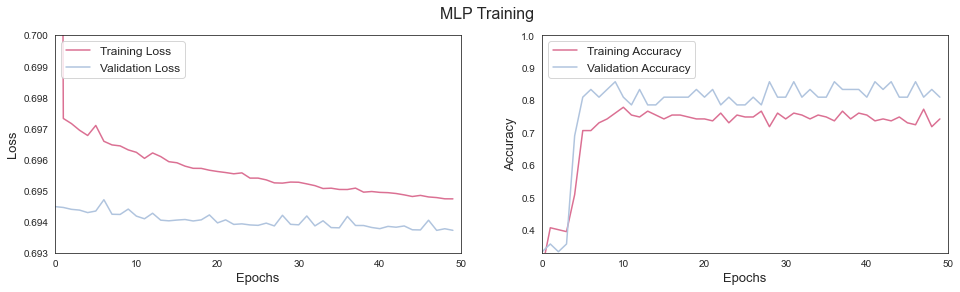

In [20]:
# Plot the training and validation loss and accuracy

fig, ax = plt.subplots(1, 2, figsize = (16, 4))
fig.suptitle('MLP Training', fontsize = 16)
ax[0].plot(history.history['loss'], 'palevioletred', label = 'Training Loss')
ax[0].plot(history.history['val_loss'], 'lightsteelblue', label = 'Validation Loss')
ax[1].plot(history.history['accuracy'], 'palevioletred', label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'], 'lightsteelblue', label = 'Validation Accuracy')
ax[0].set_xlabel('Epochs', fontsize = 13), ax[0].set_ylabel('Loss', fontsize = 13), ax[0].set_xlim(0,50), ax[0].set_ylim(0.693,0.7), ax[0].legend(loc = 'upper left', fontsize = 12)
ax[1].set_xlabel('Epochs', fontsize = 13), ax[1].set_ylabel('Accuracy', fontsize = 13), ax[1].set_xlim(0,50), ax[1].set_ylim(0.33,1), ax[1].legend(loc = 'upper left', fontsize = 12)
plt.show()

In [21]:
%%capture
train_accuracy = round(100*MLP.evaluate(X2_train, y2_train)[1],2)
test_accuracy = round(100*MLP.evaluate(X2_test, y2_test)[1],2)

In [22]:
print(f'The training set accuracy for the model is {train_accuracy}%')
print(f'The test set accuracy for the model is {test_accuracy}%')

The training set accuracy for the model is 73.68%
The test set accuracy for the model is 81.13%


At the moment, we are not able to understand why MLP is not giving the good results comparable to logistic regression, but we are hoping to gain more insights into this topic in the future.

## 6. Testing on Univ.AI student data

According to our best classifier, we have the following results:

In [23]:
# Predicting for Univ.AI students

univ_pred = lreg.predict(df_univ[list(features_final.columns)])
df_univ = df_univ[['Name','String']]
df_univ['Human or cyborg'] = univ_pred
df_univ.replace({'Human or cyborg': {0: 'Human', 1: 'Cyborg'}})

,Name,String,Human or cyborg
0,Niegil,1010101010011110001001010100010010010001011101...,Human
1,Vishnu,0101010101010111110101010100010000101010100101...,Human
2,Sakthi,1010101010000010101001000000001010101000001010...,Human
3,Surojit,1001011101010101110111101010101010101101010101...,Human
4,Araz,1010101010100001111111111111000111111111111111...,Human
5,Wang,1111000101010101010000000001111101010100110011...,Human
6,Kushal,1011110011101000010000000011111010101010100111...,Human
7,Pavan,1001100010100101001010101010111101101000010110...,Human
8,Praneetha,1011011011111100001010000001100100111001111010...,Cyborg
9,Vipul,1101010100100101100101001010101110000111010101...,Human


Congratulations, Praneetha!

## Outlook 1: Can we learn to fake randomness better?

We are all quite bad at faking randomness. But can our biases in perception of randomness be reduced if we are conscious about them? 

Here's a little experiment. We will compare human sequences generated in the beginning and in the end of the project (i.e, after analyzing the differences and making conclusions).

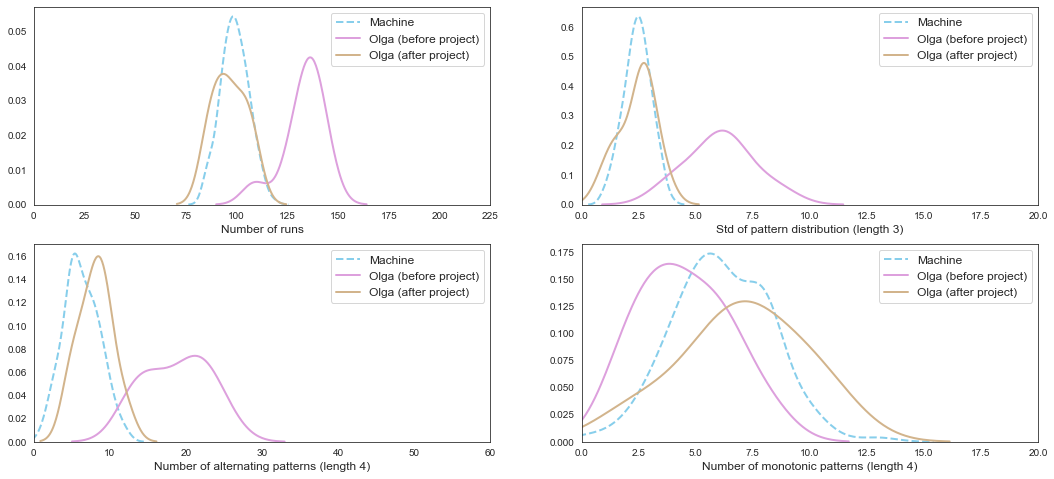

In [24]:
# Before and after

# Dataframe with test results only
features_olga = df_olga.drop("String", axis = 1)

# Labeled data
df_olga['Label'] = np.concatenate((np.zeros(10), np.ones(10)))

test_list = ['run_test','block_3_test','alter_4_test','mono_4_test']
xlim_list = [225, 20, 60, 20]
label_list = ['Number of runs', 'Std of pattern distribution (length 3)', 'Number of alternating patterns (length 4)', 'Number of monotonic patterns (length 4)']

plt.figure(figsize=(18,8)), sns.set_style("white")
for i in range(0,4):
    plt.subplot(2,2,i+1)
    d = sns.distplot(features.loc[df['Label'] == 1, [test_list[i]]], label = "Machine", bins = 3, hist_kws = dict(edgecolor = "none"), color = 'skyblue', hist = False, kde_kws = {'linestyle':'--','linewidth':2}) 
    d = sns.distplot(features_olga.loc[df_olga['Label'] == 0, [test_list[i]]], label = "Olga (before project)", bins = 3, hist_kws = dict(edgecolor = "none"), color = 'plum', hist = False, kde_kws = {'linewidth':2})
    d = sns.distplot(features_olga.loc[df_olga['Label'] == 1, [test_list[i]]], label = "Olga (after project)", bins = 3, hist_kws = dict(edgecolor = "none"), color = 'tan', hist = False, kde_kws = {'linewidth':2})
    d.set_xlabel(label_list[i], fontsize = 12), d.set_ylabel("", fontsize = 12), plt.legend(fontsize = 12), plt.xlim(0,xlim_list[i])
#warnings.filterwarnings('ignore')

The improvement is obvious. In the top graphs, we see that the number of runs and distribution of block patterns were improved significantly. 
In the bottom graphs, we observe that it was still somewhat difficult to get rid of alternating patterns. On the contrary, the number of monotonic patterns was even "overshooting" the randomness. 

## Outlook 2: Usage of NNs

We believe than apart from our toy example, neural networks can be used in many other scenarios where a subtle amount of structure is present in the environment with a lot of random noise (e.g., astrophysics). Good learning ability of neural networks may provide new ideas and framework for such structure detection tasks.

## References

[1] Kahneman, Daniel; Tversky, Amos (1972). "Subjective probability: A judgment of representativeness".<br/>
[2] https://github.com/chadfranzen/FakeRandomness<br/>
[3] NIST SP-800 22: A Statistical Test Suite for Random and Pseudorandom Number Generators for Cryptographic     Applications, https://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-22r1a.pdf<br/>
[4] Dieharder: A Random Number Test Suite, https://webhome.phy.duke.edu/~rgb/General/dieharder.php<br/>